<a href="https://colab.research.google.com/github/maitri2323/decision-tree-implementation/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Recommendation System using Collaborative Filtering  
**Author:** Maitri Chauhan
**Project:** Recommendation System (Project 4)  
**Goal:** Build a recommendation system using user-item rating data and cosine similarity (collaborative filtering logic).  
**Position:** Student of Computer Engineering  

---




In [13]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample user-item ratings (you can replace with real dataset)
data = {
    'User': ['A', 'A', 'B', 'B', 'C', 'C', 'D'],
    'Item': ['Item1', 'Item2', 'Item1', 'Item3', 'Item2', 'Item3', 'Item1'],
    'Rating': [5, 3, 4, 2, 4, 5, 2]
}

df = pd.DataFrame(data)
df.head()

,User,Item,Rating
0,A,Item1,5
1,A,Item2,3
2,B,Item1,4
3,B,Item3,2
4,C,Item2,4


## 📊 Creating User-Item Matrix  
We’ll pivot the data to form a matrix where rows are users and columns are items.

In [14]:
user_item_matrix = df.pivot_table(index='User', columns='Item', values='Rating')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix

Item,Item1,Item2,Item3
User,,,
A,5.0,3.0,0.0
B,4.0,0.0,2.0
C,0.0,4.0,5.0
D,2.0,0.0,0.0


## 🔍 Compute User Similarity  
We use **Cosine Similarity** to find users who have similar taste. Then we can recommend items based on neighbors’ ratings.

In [15]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
user_similarity_df

User,A,B,C,D
User,,,,
A,1.000000,0.766965,0.321403,0.857493
B,0.766965,1.000000,0.349215,0.894427
C,0.321403,0.349215,1.000000,0.000000
D,0.857493,0.894427,0.000000,1.000000


## 🌟 Make Simple Recommendations  
Let’s recommend items to a specific user (e.g., user 'A') based on similar users.

In [16]:
target_user = 'A'
similar_users = user_similarity_df[target_user].sort_values(ascending=False)[1:]

# Items user 'A' hasn't rated yet
user_ratings = user_item_matrix.loc[target_user]
unrated_items = user_ratings[user_ratings == 0].index

# Weighted score for each unrated item
recommendations = {}

for item in unrated_items:
    score = 0
    sim_total = 0
    for other_user in similar_users.index:
        rating = user_item_matrix.loc[other_user, item]
        if rating > 0:
            sim = user_similarity_df.loc[target_user, other_user]
            score += sim * rating
            sim_total += sim
    if sim_total > 0:
        recommendations[item] = score / sim_total

# Show top recommendations
pd.Series(recommendations).sort_values(ascending=False)

,0
Item3,2.885922


## 📈 Visualizing Top Recommendations  
Let’s display the recommended items for our user in a neat bar chart for better understanding!

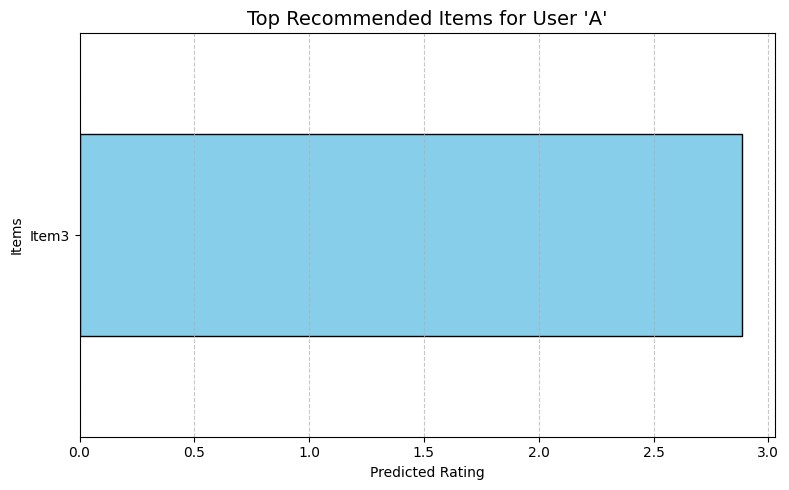

In [17]:
import matplotlib.pyplot as plt

# Convert recommendations dict to series for plotting
recommendation_series = pd.Series(recommendations).sort_values(ascending=True)

# Plot barh chart (horizontal bar)
plt.figure(figsize=(8, 5))
recommendation_series.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title(f"Top Recommended Items for User '{target_user}'", fontsize=14)
plt.xlabel("Predicted Rating")
plt.ylabel("Items")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## ✅ Conclusion  
- We built a user-based **collaborative filtering** system without external libraries  
- It uses **cosine similarity** to find similar users  
- Then recommends items the target user hasn't rated, based on neighbors' preferences  

Simple, intuitive, and working beautifully ✨  